# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [150]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/EDA_mini-project/EDA_hospital_admissions/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/vickimoore/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


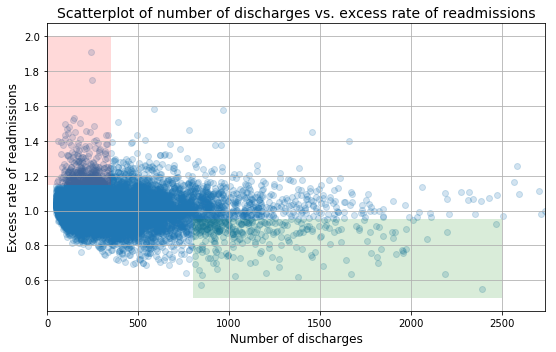

In [35]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Initial observations

The policy recommendations based on the preliminary analysis may or may not be sound, but, as presented, this analysis seems insufficient to form a basis for recommendations. The preliminary analysis includes policy recommendations that seem to be based on a scatterplot without including an assessment of correlation, a test of significance, or mention of other factors. There are boxes attached to the scatterplot that indicate extremes of discharge numbers and categories of rate of readmission, but it is unclear what these boxes represent. 

The nature of the dataset also suggests that number of discharges is a proxy for hospital size, which makes sense for a quick judgment of the basic relationship between discharge and readmission, but it may be appropriate to examine features such as average length of stay prior to discharge, average proportion of vacant beds, whether facilities emphasize shorter-stay (such as surgical recovery) or longer-stay accommodations for more complex cases, or other factors. Perhaps these details are incorporated into expected readmission ratios, but we do not have that sort of insight available. However, while we do not have access to those details here, we can more thoroughly vet the recommendations included with the preliminary analysis.

# Analysis of the hospital readmission data

Following the available preliminary analysis, we will now consider whether the initial recommendations hold up after more intensive statistical analysis. This will entail analysis of the Pearson's correlation coefficient between the numbers of discharges and excess ratios of readmission and application of a statistical significance test. Then, a permutation test will be used to compare excess ratios of readmission between sample populations. The preliminary analysis divides hospitals into categories of big (300 or more discharges) or small (fewer than 300 discharges) for policy recommendations, so we will continue to categorize hospitals as such. 

The null hypothesis for any statistical test in this analysis is that hospitals as defined here as big or small show no difference in excess readmission ratio. The alternate hypothesis is that there is a difference between these categories for excess readmission ratio.

## Assessment of correlation coefficient and statistical significance

In [8]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [11]:
#Looks like some data in discharge column and others may be missing or otherwise erroneous, so set to what is in the 
#excess readmission ratio column.
clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [14]:
#Pearson's correlation coefficient manually calculated
def pr(m, n):
    corr = np.corrcoef(m, n)
    return corr[0,1]
r = pr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])
print("Pearson's correlation coefficient (r):",r)

Pearson's correlation coefficient (r): -0.0973979435108


In [39]:
#Scipy calculation of Pearson's r and p-value
pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])
print("Pearson's correlation coefficient (r):", pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])[0])
print("Significance value (p):",pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])[1])

Pearson's correlation coefficient (r): -0.0973979435108
Significance value (p): 1.22254737768e-25


The correlation coefficient between number of discharges and excess readmission ratio column is negative, as expected according to the preliminary analysis, suggesting that hospitals with fewer discharges show more excess readmissions. However, this is a very small correlation coefficient, with an absolute value of < 0.1, meaning it is a weak connection, and possibly there are other factors that show a stronger relationship with excess readmissions. Still, this correlation between number of discharges and excess readmission ratio shows a statistically significant relationship of well below p < 0.01 (p = 1.22e-25), so we would reject the null hypothesis that size (as defined by number of discharges) is not associated with a difference in excess readmissions. Whether this is a practically significant result, however, is unclear. Since the correlation between number of discharges and excess readmission ratios is so small, we should pursue consideration of other factors to explain excess readmissions.

## Permutation test of mean excess readmissions between hospital populations by size

In [32]:
perm_df = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]
small = perm_df[perm_df['Number of Discharges'] <= 300]
big = perm_df[perm_df['Number of Discharges'] > 300]

In [33]:
print(perm_df.info())
print(small.info())
print(big.info())
print(small.describe())
print(big.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 1832 to 3835
Data columns (total 2 columns):
Number of Discharges        6132 non-null int64
Excess Readmission Ratio    6132 non-null float64
dtypes: float64(1), int64(1)
memory usage: 143.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5365 entries, 1309 to 13666
Data columns (total 2 columns):
Number of Discharges        5365 non-null int64
Excess Readmission Ratio    5365 non-null float64
dtypes: float64(1), int64(1)
memory usage: 125.7 KB
None
       Number of Discharges  Excess Readmission Ratio
count           6132.000000               6132.000000
mean             170.018428                  1.014261
std               70.194140              

In [34]:
#Permutation replicate functions.
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data1, data2, func, size=1):
    perm_replicates = np.empty(size)
    for w in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        perm_replicates[w] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def mean_diff(data1, data2):
    diff_mean = np.mean(data1) - np.mean(data2)
    return diff_mean

#Applied to mean excess readmission ratios by hospital discharge category.
np.random.seed(29)
raw_diff_means = mean_diff(small['Excess Readmission Ratio'], big['Excess Readmission Ratio'])
perm_replicates = draw_perm_reps(small['Excess Readmission Ratio'], big['Excess Readmission Ratio'], mean_diff, size=10000)
p_size = np.sum(perm_replicates >= raw_diff_means) / len(perm_replicates)
print("P-value for excess readmissions by size:",p_size)

P-value for excess readmissions by size: 0.0


With samples drawn from 10,000 replicates, permutation hypothesis testing indicates there is a statistically significant difference in means (p-value of 0.0) between small and big hospitals for excess readmission ratios, with big hospitals showing slightly fewer excess readmissions (excess readmission ratio mean 0.9998 vs. 1.014 for small hospitals). This bolsters the notion that hospital size, as defined by number of discharges, is related to excess readmissions, with bigger hospitals having a slightly lower excess ratio of readmissions than small ones do. However, in practical terms the means for excess readmissions in each hospital sample, like the correlation coefficient above, do not show a strong relationship versus number of discharges. Taken together these data suggest we should consider  hospitals with small numbers of discharges as being at risk of excess readmissions, but we should also keep looking for any factors that may explain excess readmissions more convincingly. 

The policy recommendation that requires smaller hospitals to demonstrate improved resource allocation may or not be appropriate and should take into account any factors more strongly related to excess readmissions. However, as a matter of principle, optimization of resource allocation should always be considered for hospitals of any size for a number of reasons. The recommendation of providing incentives for consolidation of hospitals may be appropriate. Directives have potential to be constraining in some circumstances, particularly in this case in which we cannot be confident that we understand the whole picture around excess readmissions. Also, consolidation of hospitals and facilities in a region would have to examined for any negative sequellae; how best to serve the various needs of the patient community should be the highest priority and requires careful consideration of multiple factors.

# Plotting considerations
The scatterplot above is informative in that it does show the level and direction of correlation in a visual sense; the Pearson's correlation coefficient suggests a weak negative relationship between number of discharges and excess readmission ratios, and this the same feeling we get from the graph above. Scatterplots are inherently useful at allowing the viewer to clearly spot any relationships between the plotted variables. The boxes superimposed on the graph show which data points appear to be from very big or very small hospitals and where they fall for excess readmissions. However, in this case they do not seem to add value and cause the viewer to spend extra time trying to understand the value they contribute, particularly since it is not obvious what the borders of the boxes represent. The viewer cannot ascertain a meaningful cutoff at 300 discharges, which is the cutoff described in the policy recommendations.

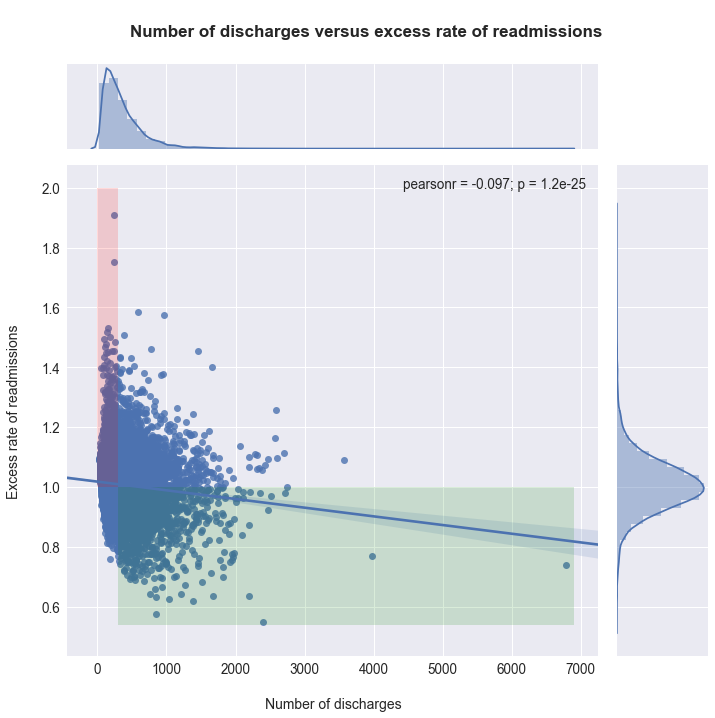

In [191]:
sns.set()
sns.set(font_scale=1.35)
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=perm_df, kind='reg', size=10)
#plt.xlim([0, max(x)])
#To show excess readmissions 1-2 for up to <300 discharges and excess readmissions up to 1 for discharges >= 300.
plt.fill_between([0,299], 1.0, 2.0, facecolor='red', alpha = .15, interpolate=True)
plt.fill_between([300,6900], 0.54, 1.0, facecolor='green', alpha = .15, interpolate=True)
plt.xlabel('\nNumber of discharges', fontsize=14)
plt.ylabel('Excess rate of readmissions\n', fontsize=14)
plt.subplots_adjust(top=0.90)
plt.suptitle('\nNumber of discharges versus excess rate of readmissions', fontsize=17, fontweight='bold')
plt.show()

The figure above is similar to that shown with the preliminary analysis, however, it shows a trendline as well as Pearson's correlation coefficient and p-value associated with the correlation coefficient. This allows us to quantify the relationship between the two variables in the graph. The jointplot also allows us to see the distributions of data points for each variable; with a graph containing so many data points that overlap each other, this is helpful for allowing us to understand the nature of the data. Here, this reveals that the excess rates of readmissions follow a fairly balanced normal-appearing distribution around the mean. On the other hand, the numbers of discharges are considerably less balanced around their mean, with a large tail to the right. In the absence of distinct, visible subpopulations of data points, the boxes superimposed on the figure reflect where a 300-discharge cutoff lies on one axis, as well as where the line for an excess readmission rate of 1.0 exists. 

In the figure above, within the red box are data points representing hospitals that would be impacted by the policy recommendations described above. If the assumptions upon which the recommendations were based are correct, we may look for improvements in excess rates of readmission for these hospitals under the recommendations. The green box includes data points for hospitals that are already larger than those being prescribed new standards under the recommendations and which may be seen as currently showing a satisfactory excess readmission ratio. The data points above the green box and to the right of the red box are numerous, however, suggesting there is still more to consider to reduce excess rates of readmission. Hospitals represented by data points to the left of the green box and below the red box have already demonstrated lower excess readmissions ratios, so these should be examined for unintended consequences (positive or negative) should the policy recommendations take effect.

Finally, this analysis serves as a reminder that a large enough dataset may show statistical significance for apparent trends that may be weak. This does not necessarily imply practical significance.